# <center>Computational Methods in Science and Technology</center>
## <center>Laboratory 2</center>

# Table of Contents

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## functions

In [2]:
def get_relative_error_from_result(result, actual, dtype=np.float64):
    return dtype(np.absolute( (result-actual)/actual))

In [3]:
def generate_a_b(n):
    return np.random.random((n, n)), np.random.random(n)

# Gauss-Jordan Method

In [4]:
def gauss_jordan(a, b):
    def scale(a, b):
        new_a = []
        new_b = []

        for i, row in enumerate(a):
            max = np.max(row)
            new_a.append(row / max)
            new_b.append(b[i] / max)
        return new_a, new_b

    a, b = scale(a, b)  # not to overwrite given arguments
    a = np.array(a, dtype=np.float64)
    b = np.array(b, dtype=np.float64)

    n = len(a)

    for c in range(n):
        pivot_index = np.argmax(a[c:, c]) + c
        a[[c, pivot_index]] = a[[pivot_index, c]]  # swap rows
        b[c], b[pivot_index] = b[pivot_index], b[c]

        for r in range(n):
            if r != c:
                multiplier = a[r][c] / a[c][c]
                a[r] -= multiplier * a[c]
                b[r] -= multiplier * b[c]

    return b / np.diagonal(a)

In [6]:
a, b = generate_a_b(30)
np.set_printoptions(precision=18)
np_result = np.linalg.solve(a, b)
gj_result = gauss_jordan(a, b)
print("np: ", np_result)
print("gj: ", gj_result)
np.set_printoptions(precision=2)
print("gauss jordan relative error to numpy:\n ",get_relative_error_from_result(gj_result, np_result))
np.set_printoptions(precision=8)

np:  [-49.31608118137947   29.524184009222278  37.094123784937274
 -32.376345906124506  35.044231587613424]
gj:  [-49.31608118137928   29.52418400922216   37.094123784937146
 -32.37634590612439   35.044231587613304]
gauss jordan relative error to numpy:
  [3.75e-15 3.97e-15 3.45e-15 3.51e-15 3.45e-15]


In [7]:
def get_relative_gauss_jordan_erros(shapes = (5, 10, 15)):
    errors = []
    for shape in shapes:
        a, b = generate_a_b(shape)
        x2 = np.linalg.solve(a, b)
        x1 = gauss_jordan(a, b)
        errors.append(np.average(get_relative_error_from_result(x1,x2)))
    return errors   

Text(0, 0.5, 'Gauss Jordan relative error to numpy.linalg.solve ')

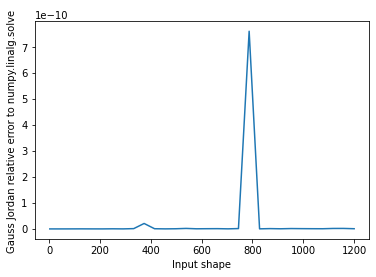

In [8]:
x = list(map(int, np.linspace(3, 1200, 30)))
errors = get_relative_gauss_jordan_erros(shapes= x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, errors)
ax.set_xlabel('Input shape')
ax.set_ylabel("Gauss Jordan relative error to numpy.linalg.solve ")

## Maximum error

In [9]:
np.set_printoptions(precision=2)
print("Maximum error observed: ", np.max(errors))
np.set_printoptions(precision=8)

Maximum error observed:  7.618469938938136e-10


---
- as input dimension grows, Gauss Jordan errors also **sligthly** grows
---

## Time

In [19]:
import time

def plot_times():
    x = list(map(int, np.linspace(3, 700, 20)))
    gj_times = []
    np_times = []
    for shape in x:
        a, b = generate_a_b(shape)
        start = time.time()
        gauss_jordan(a, b)
        end = time.time()
        gj_times.append(end - start)

        start = time.time()
        np.linalg.solve(a, b)
        end = time.time()
        np_times.append(end - start)
    plt.plot(x, gj_times, label="Gauss Jordan")
    plt.plot(x, np_times, label="Numpy")
    plt.ylabel('time [s]')
    plt.xlabel('n')
    plt.legend()
    plt.show()

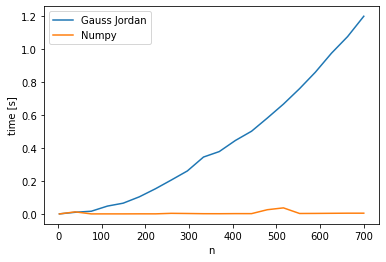

In [20]:
plot_times()

In [12]:
a, b = generate_a_b(1300)

In [13]:
%%time 
_ =np.linalg.solve(a, b)

CPU times: user 274 ms, sys: 11.3 ms, total: 286 ms
Wall time: 43.7 ms


In [14]:
%%time
_=gauss_jordan(a, b)

CPU times: user 4.84 s, sys: 1.33 s, total: 6.17 s
Wall time: 4.49 s


---
- gauss_jordan implementation is much **slower** than numpy solver, probably to inefficient use of numpy arrays (get rid of python's for)
- also np.linalg.solve is using different algorithm

---

# LU Factorization

In [26]:
def LU_factorization(a):
    n = len(a)
    U = a.copy()
    L = np.eye(n)

    for c in range(n):
        for r in range(c + 1, n):
            multiplier = U[r][c] / U[c][c]
            U[r] -= multiplier * U[c]
            L[r][c] = multiplier
    return L, U


def LU_abs_error(a, L, U):
    return np.sum(np.absolute(a - L@U))

In [27]:
a, _ = generate_a_b(50)
L, U = LU_factorization(a)
LU_abs_error(a, L, U)

3.803711306430563e-12

In [34]:
def plot_LU_abs_errors():
    x = list(map(int, np.linspace(3, 1200, 20)))
    errors = []
    for shape in x: 
        a, _ = generate_a_b(shape)
        L, U = LU_factorization(a)
        LU_abs_error(a, L, U)
        errors.append(LU_abs_error(a, L, U))
    plt.plot(x, errors, label="LU_abs_error")
    plt.ylabel('error')
    plt.xlabel('n')
    plt.legend()
    plt.show()

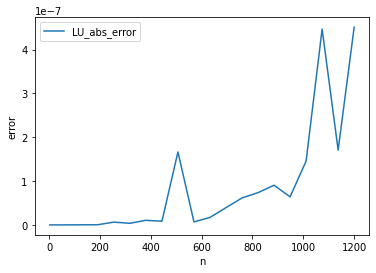

In [35]:
plot_LU_abs_errors()

---
* As n grows, LU_abs_error also grows, because we are making more operations on floats that are prone to error